# Rosbag Classification
## By Cedric

#### bagreader runs on versions < python3.10 unlike the other module at [rosbags-dataframe module](https://pypi.org/project/rosbags-dataframe/)

In [2]:
import rosbag
import rospy
from bagpy import bagreader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# convert rosbag to df
bagread = bagreader('autocross_13_47_15.bag')
topic = '/estimation/velocity'
# replace the topic name as per your need
LASER_MSG = bagread.message_by_topic(topic)
df = pd.read_csv(LASER_MSG)
df.shape

[INFO]  Data folder autocross_13_47_15 already exists. Not creating.


(10839, 21)

.csv file is extracted from .bag file and saved in a folder of the given bag's name. Folder could be deleted once done with classification or kept for easy data access.

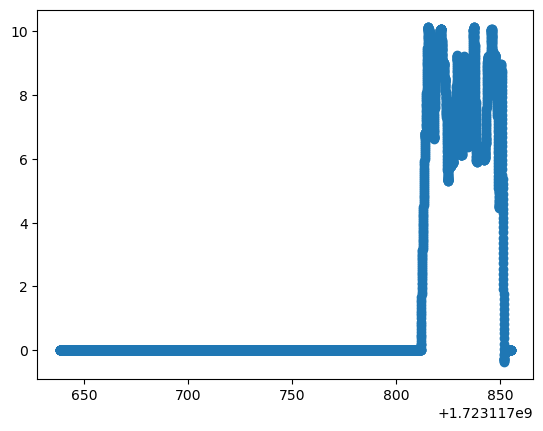

In [10]:
vel_df = df[['Time', 'twist.twist.linear.x', 'twist.twist.linear.y', 'twist.twist.angular.z']].copy()
plt.scatter(vel_df['Time'], vel_df['twist.twist.linear.x'], linewidths=1)
plt.show()

In [6]:
bag = rosbag.Bag('autocross_13_47_15.bag')
start_time = bag.get_start_time()
end_time = bag.get_end_time()

In [ ]:
type(start_time)

float

Convert rostime to time in sec for easier processing

In [19]:
vel_df['Time'] = vel_df['Time'] - start_time
vel_df.drop(['Time'], axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
twist.twist.linear.x,9296.0,1.614236,3.192568,1.202399e-08,0.000134,0.000331,0.000587,10.150620
twist.twist.linear.y,9296.0,-0.016602,0.240817,-1.004311e+00,0.000032,0.000072,0.000160,0.937939
twist.twist.angular.z,9296.0,-0.033537,0.221778,-1.151399e+00,0.000365,0.000652,0.000902,0.822836


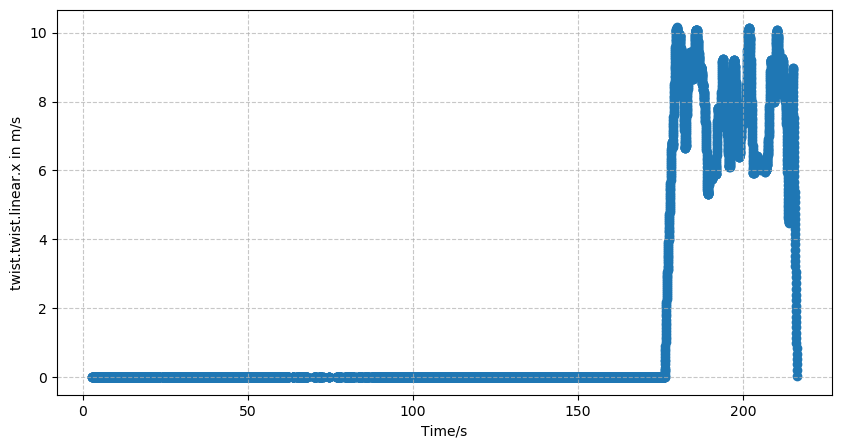

In [23]:
plt.figure(figsize=(10, 5))
plt.xlabel('Time/s')
plt.ylabel('twist.twist.linear.x in m/s')
plt.grid(True, linestyle='--', alpha=0.7)
plt.scatter(vel_df['Time'], vel_df['twist.twist.linear.x'], linewidths=1)
plt.show()

In [ ]:
def det_acc(rosb):
    # function to determine accelerations
    # if deceleration abrupt and large, may be invalid bag
    # does not use dataframe in final version
    acc_list = []
    times = vel_df['Time']
    velx = vel_df['twist.twist.linear.x']

    for i in range(6, len(velx)):
        try:
            delta_velx = velx[i] - velx[i - 5]
            delta_time = times[i] - times[i - 5]
        
        # to account for missing indexes
        # e.g. times[137] gives KeyError
        except KeyError:
            continue

        acc = delta_velx/delta_time
        acc_list.append([round(acc, 3), round(times[i - 5], 2), round(times[i], 2), i, i - 5])

    # returns [[acc, t1, t2, i1, i2]]
    return acc_list

Greatest deceleration: -5.467 ms-2 occuring for delta time: 182.16 s - 182.1 s


In [ ]:
def classify(folder_path):
    # function to classify 
        # reads bags
        # det_acc(bag)
        # if (det_acc > threshold and velx)
    pass